# **Project Name**    - Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1**   - Deepak Singh Bisht

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/bisht-deepak/Capstone-Project-Recommendation-System

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [29]:
#for data manipulation
import numpy as np
import pandas as pd
import geopandas as gpd

#for data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import geoviews as gv
from cartopy import crs

#for displaying dataframes
from IPython.display import display

#for text manipulation
from termcolor import colored

#for regex
import re
#for caching the results
from functools import cache

#for progressbar
from tqdm import tqdm

#for removing warnings
import warnings
warnings.filterwarnings("ignore") 

#for hypothesis testing
from scipy.stats import (
    chi2_contingency, f_oneway)

#for splitting the dataset
from sklearn.model_selection import train_test_split

#for model builiding
from sklearn.metrics.pairwise import cosine_similarity

### Dataset Loading

In [3]:
def convert_publishing_year(x):
    try:
        return pd.to_datetime(x, format= "%Y")
    except ValueError:
        return None

In [4]:
books_df= pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv", converters= {"Year-Of-Publication": convert_publishing_year})#.dropna()
ratings_df= pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv")#.dropna()
users_df= pd.read_csv("/kaggle/input/book-recommendation-dataset/Users.csv")

### Dataset First View

In [5]:
books_df.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford          2002-01-01     Oxford University Press   
1  Richard Bruce Wright          2001-01-01       HarperFlamingo Canada   
2          Carlo D'Este          1991-01-01             HarperPerennial   
3      Gina Bari Kolata          1999-01-01        Farrar Straus Giroux   
4       E. J. W. Barber          1999-01-01  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [1]:
ratings_df.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [7]:
users_df.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

#### Renaming Columns

### Dataset Rows & Columns count

In [94]:
print(colored("Shape of", attrs= ["bold"]))
print(f"books_df: {books_df.shape}")
print(f"ratings_df: {ratings_df.shape}")
print(f"users_df: {users_df.shape}")

Shape of
books_df: (271360, 8)
ratings_df: (1149780, 3)
users_df: (278858, 3)


### Dataset Information

In [97]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ISBN                 271360 non-null  object        
 1   Book-Title           271360 non-null  object        
 2   Book-Author          271358 non-null  object        
 3   Year-Of-Publication  266737 non-null  datetime64[ns]
 4   Publisher            271358 non-null  object        
 5   Image-URL-S          271360 non-null  object        
 6   Image-URL-M          271360 non-null  object        
 7   Image-URL-L          271357 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 16.6+ MB


In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [88]:
print(colored("Number of Duplicated rows in ", attrs= ["bold"]))
print(f"books_df: {books_df.duplicated().sum()}")
print(f"ratings_df: {ratings_df.duplicated().sum()}")
print(f"users_df: {users_df.duplicated().sum()}")

Number of Duplicated rows in 
books_df: 0
ratings_df: 0
users_df: 0


#### Missing Values/Null Values

In [91]:
print(colored("Number of Missing Values in ", attrs= ["bold"]))
print(colored(f"books_df:\n", attrs= ["bold"]))
display(books_df.isnull().sum())
print(colored(f"ratings_df:\n", attrs= ["bold"]))
display(ratings_df.isnull().sum())
print(colored(f"users_df:\n", attrs= ["bold"]))
display(users_df.isnull().sum())

Number of Missing Values in 
books_df:



ISBN                      0
Book-Title                0
Book-Author               2
Year-Of-Publication    4623
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               3
dtype: int64

ratings_df:



User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

users_df:



User-ID          0
Location         0
Age         110762
dtype: int64

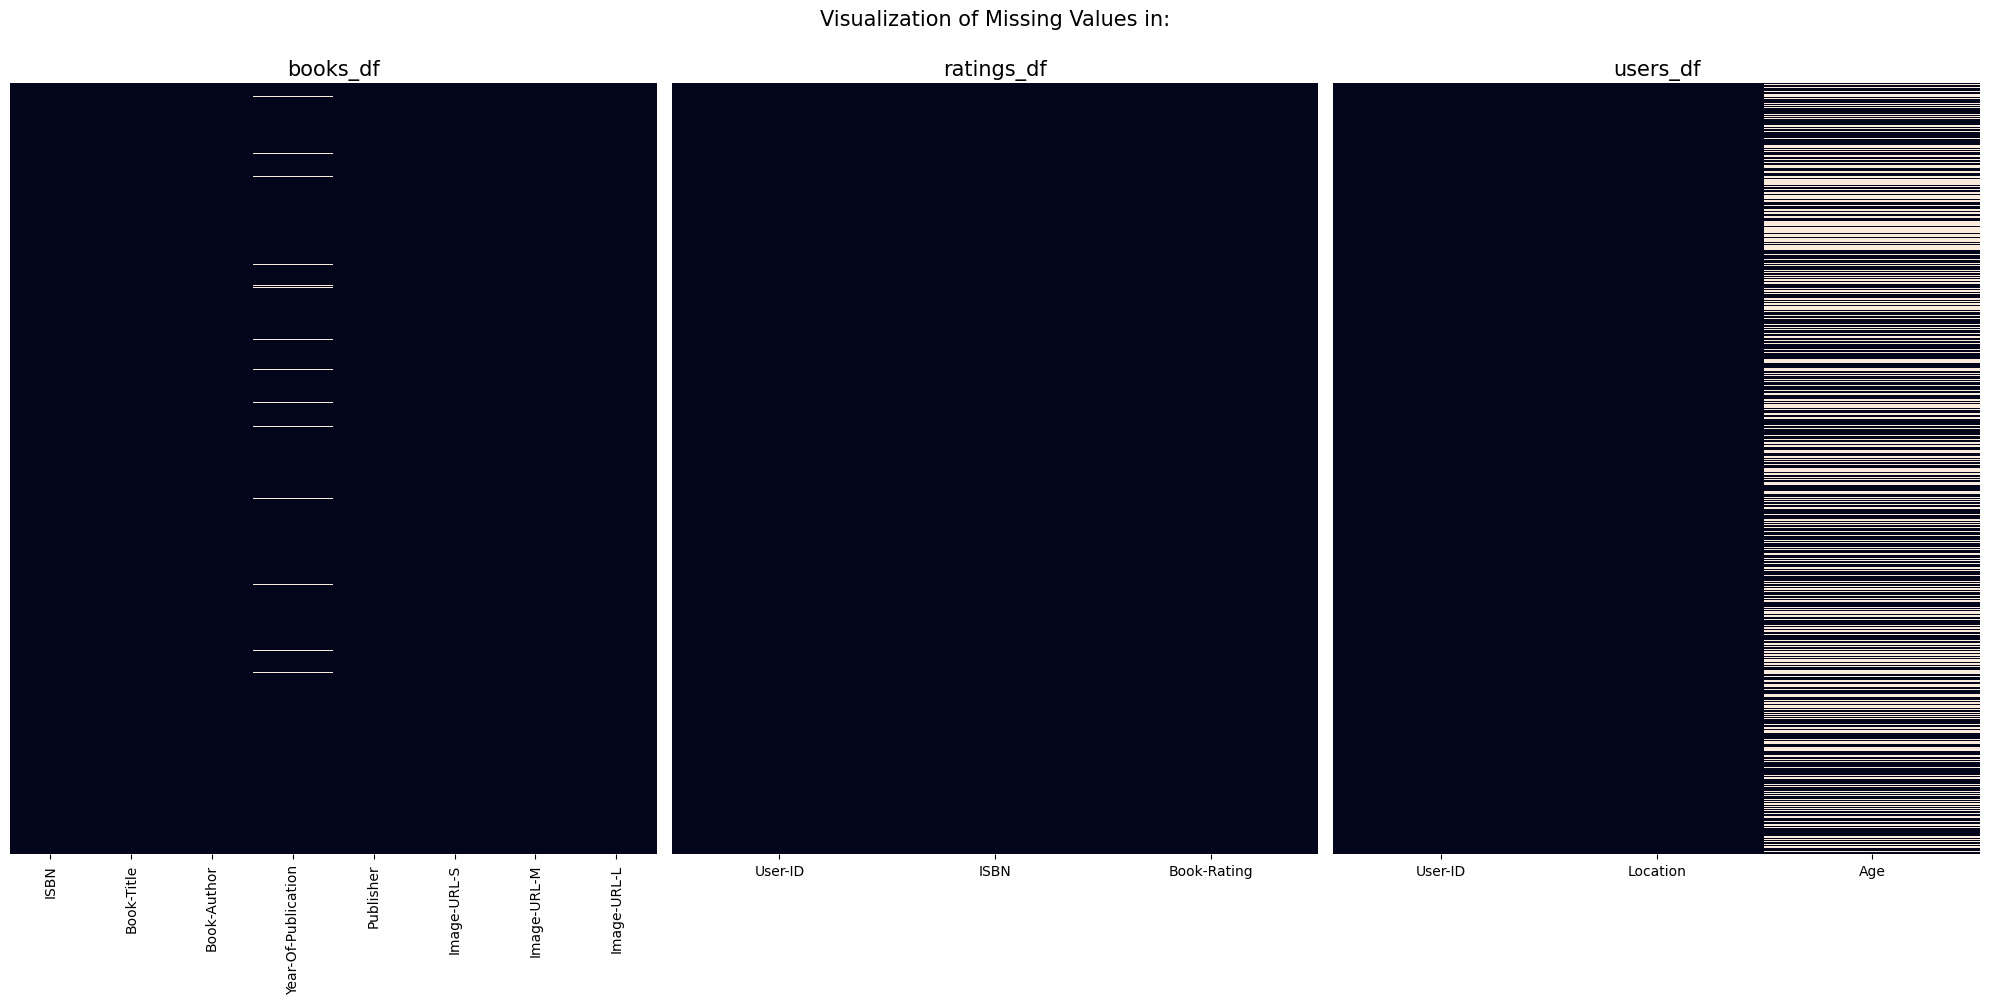

In [14]:
fig, axes= plt.subplots(1, 3, figsize= (20, 10))

sns.heatmap(books_df.isnull(), cbar= False, ax= axes[0])
axes[0].set_title("books_df", fontsize= 15)
axes[0].set_yticks([])
sns.heatmap(ratings_df.isnull(), cbar= False, ax= axes[1])
axes[1].set_yticks([])
axes[1].set_title("ratings_df", fontsize= 15)
sns.heatmap(users_df.isnull(), cbar= False, ax= axes[2])
axes[2].set_yticks([])
axes[2].set_title("users_df", fontsize= 15)

suptitle= fig.suptitle("Visualization of Missing Values in:", fontsize= 15)
suptitle.set_y(1.0)

plt.tight_layout()
plt.show()

### What did you know about your dataset?

None of the three dataframes that we'll be working with has any duplicate values. 
As for null values, user_df has none, where as books_df has a few null values in author, year and publisher, which are minimal compared to the overall data, so they can be removed w/o any significant loss of data. ratings_df has 110762 null values in age. 

## ***2. Understanding Your Variables***

In [110]:
print(colored("Variables in\n", attrs= ["bold"]))
print(colored(f"books_df:", attrs= ["bold"]))
print(books_df.columns.tolist())
print(colored(f"ratings_df:", attrs= ["bold"]))
print(ratings_df.columns.tolist())
print(colored(f"users_df:", attrs= ["bold"]))
print(users_df.columns.tolist())

Variables in

books_df:
['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
ratings_df:
['User-ID', 'ISBN', 'Book-Rating']
users_df:
['User-ID', 'Location', 'Age']


In [113]:
print(colored("Description of\n", attrs= ["bold"]))
print(colored(f"books_df:", attrs= ["bold"]))
display(books_df.describe(include= 'all'))
print("\n")
print(colored(f"ratings_df:", attrs= ["bold"]))
display(ratings_df.describe(include= 'all'))
print("\n")
print(colored(f"users_df:", attrs= ["bold"]))
display(users_df.describe(include= 'all'))

Description of

books_df:


ISBN      Book-Title      Book-Author  \
count       271360          271360           271358   
unique      271360          242135           102022   
top     0195153448  Selected Poems  Agatha Christie   
freq             1              27              632   
mean           NaN             NaN              NaN   
min            NaN             NaN              NaN   
25%            NaN             NaN              NaN   
50%            NaN             NaN              NaN   
75%            NaN             NaN              NaN   
max            NaN             NaN              NaN   

                  Year-Of-Publication  Publisher  \
count                          266737     271358   
unique                            NaN      16807   
top                               NaN  Harlequin   
freq                              NaN       7535   
mean    1993-09-11 05:58:28.251198848        NaN   
min               1806-01-01 00:00:00        NaN   
25%               1989-01-01 00:00:00        NaN   
50%               1996-01-01 00:00:00        NaN   
75%               2000-01-01 00:00:00        NaN   
max               2050-01-01 00:00:00        NaN   

                                              Image-URL-S  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
freq                                                    2   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
freq                                                    2   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              Image-URL-L  
count                                              271357  
unique                                             271041  
top     http://images.amazon.com/images/P/225307649X.0...  
freq                                                    2  
mean                                                  NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN



ratings_df:


User-ID        ISBN   Book-Rating
count   1.149780e+06     1149780  1.149780e+06
unique           NaN      340556           NaN
top              NaN  0971880107           NaN
freq             NaN        2502           NaN
mean    1.403864e+05         NaN  2.866950e+00
std     8.056228e+04         NaN  3.854184e+00
min     2.000000e+00         NaN  0.000000e+00
25%     7.034500e+04         NaN  0.000000e+00
50%     1.410100e+05         NaN  0.000000e+00
75%     2.110280e+05         NaN  7.000000e+00
max     2.788540e+05         NaN  1.000000e+01



users_df:


User-ID                         Location            Age
count   278858.00000                           278858  168096.000000
unique           NaN                            57339            NaN
top              NaN  london, england, united kingdom            NaN
freq             NaN                             2506            NaN
mean    139429.50000                              NaN      34.751434
std      80499.51502                              NaN      14.428097
min          1.00000                              NaN       0.000000
25%      69715.25000                              NaN      24.000000
50%     139429.50000                              NaN      32.000000
75%     209143.75000                              NaN      44.000000
max     278858.00000                              NaN     244.000000

### Variables Description of


**books_df**   

<div style="text-align: left; display: inline-block;">
    
| variable  | description               |
|-----------|---------------------------|
| isbn      | isbn code of the book     |
| title     | title of the book         |
| author    | author(s) of the book     |
| publisher | publisher(s) of the book  |
| year      | year the book was published|

</div>

**ratings_df**  

<div style="text-align: left; display: inline-block;">
    
|variable|description|
|--------|-----------|
|id|unique identification number given to each user|
|rating|user's rating of the book,either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0|
|isbn|isbn code of the book|

</div>

**users_df**  

<div style="text-align: left; display: inline-block;">
    
|variable|description|
|--------|-----------|
|id|unique identification number given to each user|
|location|a nominal variable, denoting the city, state/province and country of the user|
|age|user's age|
    
</div>

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
def rename_cols(X):
    x= lambda x: x[0] if x[0]== "year" else x[-1]
    return x(X.lower().split("-"))

In [18]:
def tweak_books_df(X):
    
    def extract_isbn_mapping(Y):
        x= (
            Y
            .groupby(['title', 'author'], as_index= False)
            ['isbn']
            .agg(list)
            ["isbn"]
            .tolist()
        )
        globals()["isbn_mapping"]= dict()
        for i in x:
            for j in i:
                isbn_mapping[j]= i[0]
        return Y
    
    return (
        X
        .rename(rename_cols, axis= 1)
        .drop(columns= ["s", "m", "l"])
        .dropna()
        #although there are few null values in the author variable, there are some "Not Applicable (Na)" values
        .query("author!= 'Not Applicable (Na )'")
        .assign(
            title= lambda x: (
                x["title"]
                #removing characters in-between parenthesis, including parenthesis
                .str.replace(r"(\([^)]*\))", "", regex= True)
                #rewriting "and"
                .str.replace(r"&amp;", "and", regex= True)
                #removing unwanted characters
                .str.replace(r"[\\\[\](\.{2,})(\-{2,})]", "", regex= True)
                .str.replace(r"(\-{2,})", "", regex= True)
                .str.replace(r"(\.{2,})", "", regex= True)
                #removing un-necessary spaces
                .str.replace(r'\s+', " ", regex= True)
                .str.title().str.strip()
            ),
            author= lambda x: (
                x["author"]
                #rewriting "and"
                .str.replace(r"&amp;", "and", regex= True)
                #removing unwanted characters
                .str.replace(r'[\'\\;\"\-\[\]]', "", regex= True)
                #adding a period(.) at the last name initials
                .str.replace(r'([A-Z]\.\s[A-Z])\s([A-Z][a-z]+)',r"\g<1>. \g<2>", regex= True)
                #removing space b/w first and middle initials 
                .str.replace(r'([A-Z]\.)\s([A-Z]\.)', r"\g<1>\g<2>", regex= True)
                #removing "et al."
                .str.replace(r'(et\sal[\.\s])', "", regex= True, flags= re.IGNORECASE)
                #removing characters in-between parenthesis, including parenthesis
                .str.replace(r'(\([^)]*\))', "", regex= True)
                #removing extra spaces from in-between characters
                .str.replace(r'\s+', " ", regex=True)
                .str.title().str.strip()
            ),
            publisher= lambda x: (
                x["publisher"]
                #rewriting "and"
                .str.replace(r"&amp;", "and", regex= True)
                .str.title().str.strip()
            ),
            isbn= lambda x: x["isbn"].str.strip()
        )
        #after the above manipulations, some of the book titles have be completely oblitrated
        .query("title!= ''")
        #extracting isbn codes and mapping them to another isbn code 
        .pipe(extract_isbn_mapping)
        #
        .assign(
            isbn= lambda x: x["isbn"].map(isbn_mapping)
        )
        .drop_duplicates(["isbn", "title", "author"])
        .reset_index(drop= True)
    )

In [102]:
tweaked_books_df= tweak_books_df(books_df)
tweaked_books_df.head()

In [20]:
tweaked_books_df.isnull().sum()

isbn         0
title        0
author       0
year         0
publisher    0
dtype: int64

### What all manipulations have you done and insights you found?

<b> Manipulations Done- </b>  
* Cleaned columns "title", "author", "publisher" and "isbn".
* Dropped columns containing the books' cover-photo.  
* Replaced multiple isbn codes leading the same book with a single code.
* Removed duplicate values.

<b> Insights Found- </b>  
* Some values in the "title" column contained the names of Publisher/Author/Series.   
* Although no null values were present in the "author" column, some of the entries contained "Not Applicable(Na) " that can be treated as null values.
* while parsing "&" has been replaced with "&amp;"

In [21]:
def tweak_ratings_df(df):
    def extract_existent_isbns(X):
        globals()["existent_isbns"]= (
            X
            .groupby("isbn", as_index= False)
            .size()
            .merge(
                tweaked_books_df,
                on= "isbn", how= "left"
            )
            .dropna()
            ["isbn"]
            .tolist()
        )
        return X
    
    return (
        df
        .rename(rename_cols, axis= 1)
        .query("rating!= 0")
        .assign(
            isbn= lambda x: (
                x["isbn"]
                .str.strip()
                .map(isbn_mapping)
                .fillna(x["isbn"])
            )
        )
        .groupby(["id", "isbn"], as_index= False)
        .agg({"rating": lambda x: np.round(np.mean(x), 0).astype("int")})
        .pipe(extract_existent_isbns)
        .query("isbn in @existent_isbns")
        .reset_index(drop= True)
    )

In [22]:
tweaked_ratings_df= tweak_ratings_df(ratings_df)
tweaked_ratings_df.head()

id        isbn  rating
0   8  0002005018       5
1   8  074322678X       5
2   8  0887841740       5
3   8  1552041778       5
4   8  1567407781       6

In [23]:
tweaked_ratings_df.isnull().sum()

id        0
isbn      0
rating    0
dtype: int64

### What all manipulations have you done and insights you found?

<b> Manipulations Done- </b>  
* Removed entries with implicit rating.  
* Cleaned "isbn" column and replaced alternative isbn codes with the a common isbn code.  
* Removed duplicate values.  

<b> Insights Found- </b>  
* Some users have rated different versions of the same book.  
* Some isbn codes present in "ratings_df" have not been mentioned in the "books_df".  * Ratings are classified as implicit(0) and explicit(1-10)

In [24]:
#importing df containing iso codes, names, latitudes, longitudes, and geometry of countries
country= (
    gpd.read_file("/kaggle/input/world-shapefile/world_shapefile.shp")
    [["ISO2", "ISO3", "NAME", "LON", "LAT", "geometry"]] #"FIPS", 
    .rename(columns= lambda x: x.lower())
    .assign(
        iso2= lambda x: x["iso2"].str.lower().str.strip(),
        iso3= lambda x: x["iso3"].str.lower().str.strip(),
        name= lambda x: x["name"]
        .str.lower()
        .str.replace(r'(\([^)]*\))', "", regex= True)
        .str.replace(r"korea, democratic people's republic of", r"north korea", regex= True)
        .str.replace(r',[a-z\s]*', "", regex= True)
        .str.replace(r'\bkorea', "south korea", regex= True)
        .str.replace(r"viet nam", "vietnam", regex= True)
        .str.replace(r"syrian arab republic", "syria", regex= True)
        .str.replace(r"the former yugoslav republic of", "", regex= True)
        .str.replace(r"\brepublic of", "", regex= True)
        .str.strip()
    )
)
country.head()

iso2 iso3                 name     lon     lat  \
0   ag  atg  antigua and barbuda -61.783  17.078   
1   dz  dza              algeria   2.632  28.163   
2   az  aze           azerbaijan  47.395  40.430   
3   al  alb              albania  20.068  41.143   
4   am  arm              armenia  44.563  40.534   

                                            geometry  
0  MULTIPOLYGON (((-61.68667 17.02444, -61.88722 ...  
1  POLYGON ((2.96361 36.80222, 4.78583 36.89472, ...  
2  MULTIPOLYGON (((45.08332 39.76805, 45.81999 39...  
3  POLYGON ((19.43621 41.02107, 19.60056 41.79666...  
4  POLYGON ((45.15387 41.19860, 46.00194 40.22555...

In [25]:
def get_alternative_country_dict():
    
    country_alter_dict= {
        "saudi arabia": "ksa",
        "united arab emirates": "uae",
        "canada": ["canada eh", "cananda", "canda", "il canada", "courtenay", "victoria"],
        "mexico": ["merida", "monterrey", "mâ©xico", ],
        "australia": ["australii", "autralia", "autralia", "austbritania", "granville", "queensland",],
        "israel": "isreal",
        "holy see": "vatican city",
        "algeria": ["algérie", "l'algérie", "algerie"],
        "united kingdom": ["channel islands", "england uk", "england", "english", "england uk", "essex", "frome", "hampden", "london", "northern ireland", "queenspark", "scotland", "united kindgdom", "united kindgonm", "wales", "west yorkshire", "worcester", "uk", "u k"],
        "libyan arab jamahiriya": "libya",
        "china": ["china peoples republic", "cnina",  "p r china", "chine eternelle", "chine éternelle", "liaoning", "liushi", "people's republic of china", "prchina", "zhengjiang",],
        "burma": "myanmar",
        "philippines": ["philippine", "philippinies", "phillipines", "phils", "phippines", "pinallas",],
        "taiwan": "roc",
        "malaysia": ["malaysian", "w malaysia"],
        "singapore": "singaporeunited kingdom",
        "hong kong": "hongkong",
        "new zealand": ["auckland", "newzealand"],
        "brazil": ["brasil", "distrito federal", "fortaleza",] ,
        "thailand": ["bkk", "fifi"],
        "bosnia and herzegovina": "bosnia", 
        "brunei darussalam": "brunei",
        "germany": ["bademn würtemberg", "badenwürttemberg", "bavaria", "deutsches reich", "deutschland", "geermany", "germay", "mordor",] , 
        "belgium": ["belgi", "belgique", "la belgique"],
        "south africa": ["cape town", "safrica","rsa"], 
        "oman": "sultanate of oman",
        "afghanistan": "afganstand holla",  
        "sri lanka": ["sri lankana", "srilanka"],
        "slovenia": ["pistlavakia", "slovak republik","slo",],
        "poland": "polska",
        "italy": ["basilicata", "ferrara", "l'italia", "italia", "italien", "itlay", "lazio", "lecce", "lombardia", "milano", "roma", "rosello", "sicilia",],
        "india": "indiai",
        "morocco": "maroc",
        "serbia": ["kosovo", "serbia and montenegro", "serbia montenegro"],
        "argentina":  "rosario",
        "switzerland": ["suisse", "svizzera",], 
        "spain": ["basque country", "catalonia", "catalunya spain", "catalunya", "espanha galiza", "espa±a", "espaâ±a", "españa", "euskadi", "euskal herria", "galiza", "galiza neghra", "lleida", "madrid", "orense"],
        "lao people's democratic republic": "laos",
        "northern mariana islands": "commonwealth of northern mariana islands",
        "denmark": "copenhagen", 
        "russia": "russian federation",
        "ireland": "dublin", 
        "equatorial guinea": "equatorial geuinea", 
        "paraguay": "fernando de la mora",
        "swaziland": "swazilandia", 
        "guinea-bissau":"guineabissau", 
        "croatia": "harvatija", 
        "netherlands": ["holland", "nederlands", "goteborg",],
        "south korea": "republic of korea", 
    }

    alter_country_mapping= {}
    for country, alternative in country_alter_dict.items():
        if type(alternative)== str:
            alter_country_mapping[alternative]= country
        else:
            for i in alternative:
                alter_country_mapping[i]= country
    
    
    return alter_country_mapping

In [26]:
country_alternatives= get_alternative_country_dict()
def get_country_name(y, country_alternatives= country_alternatives):
    
    country_name= country["name"].tolist()
    iso2= country["iso2"].tolist()
    iso3= country["iso3"].tolist()
    
    if y== None:
        return None

    elif len(y)< 2:
        return None

    elif len(y)<= 3:
        if y in iso2:
            return country.loc[country["iso2"]== y, "name"].squeeze()
        if y in iso3:
            return country.loc[country["iso3"]== y, "name"].squeeze()
        elif y in country_alternatives.keys():
            return country_alternatives[y]
        else:
            return mode_country

    else:
        if y in country_name:
            return y
        elif y in country_alternatives.keys():
            return country_alternatives[y]
        else:
            return mode_country

In [27]:
def extract_mode_country(X):
    a= (
        X
        .groupby("country", as_index= False).size()
        .sort_values("size", ascending= False, ignore_index= True)
        .loc[0, "country"]
    )
    globals()["mode_country"]= get_country_name(a)
    return X

In [28]:
def get_user_ratings_df(df, min_ratings):

    return (
        df
        .groupby("id", as_index= False)
        .size()
        .rename(columns= {"size": "num_ratings"})
        .assign(
            is_active= lambda x: np.where(x["num_ratings"]>= min_ratings, 1, 0)
        )
        .sort_values("num_ratings", ascending= False, ignore_index= True)
    )

In [29]:
min_ratings= 100
user_ratings_df= get_user_ratings_df(tweaked_ratings_df, min_ratings= min_ratings)
user_ratings_df.head()

id  num_ratings  is_active
0   11676         6447          1
1   98391         5687          1
2  153662         1808          1
3  189835         1766          1
4   23902         1084          1

In [38]:

    
mean_age= np.round(np.mean(users_df["Age"]), 2)

xyz= (
    (
        users_df
        .rename(rename_cols, axis= 1)
        
        .assign(  
            age= lambda x: x["age"].fillna(mean_age),
        )
        .pipe(extract_lower_and_upper_bound)
        .assign(
            
        )

    )
)
xyz
# tweaked_users_df= tweak_users_df(users_df)
# tweaked_users_df.head()

id                            location    age
0            1                  nyc, new york, usa  34.75
1            2           stockton, california, usa  20.00
2            3     moscow, yukon territory, russia  34.75
3            4           porto, v.n.gaia, portugal  20.00
4            5  farnborough, hants, united kingdom  34.75
...        ...                                 ...    ...
278853  278854               portland, oregon, usa  34.75
278854  278855  tacoma, washington, united kingdom  44.00
278855  278856           brampton, ontario, canada  34.75
278856  278857           knoxville, tennessee, usa  34.75
278857  278858                dublin, n/a, ireland  34.75

[278858 rows x 3 columns]

In [39]:
def tweak_users_df(X):
    
    mean_age= np.round(np.mean(X["Age"]), 2)
    
    def extract_lower_and_upper_bound(X):
    
        q1= np.percentile(X["age"], 25)
        q3= np.percentile(X["age"], 75)
        iqr = q3 - q1
        globals()["lower_bound"] = q1 - 1.5 * iqr
        globals()["upper_bound"] = q3 + 1.5 * iqr

        return X
    
    return (
        (
            X
            .rename(rename_cols, axis= 1)
            .assign(
                country= lambda x: x["location"]
                .str.split(",")
                .map(lambda y: y[-1])
                .str.lower()
                #replacing tilde(`) with apostrophe(')
                .str.replace(r"`", "'", regex= True)
                #removing un-necessary phrases
                .str.replace(r"\bla\s", "", regex= True)
                .str.replace(r"\ble\s", "", regex= True)
                .str.replace(r"\bthe\s", "", regex= True)
                #replacing other language characters to english characters
                .str.replace(r"é", "e", regex= True)
                .str.replace(r"ç", "z", regex= True)
                #removing un-necessary characters
                .str.replace(r"[.@öð¹ú_\"!0-9/\\?{*&ãº>}=\-¸äå½#;]", "", regex= True)
                #removing characters in-between parenthesis, including parenthesis
                .str.replace(r'(\([^)]*\))', "", regex= True)
                #removing un-necessary spaces
                .str.replace(r"\s+", " ", regex= True)
                .str.strip(),
                age= lambda x: x["age"].fillna(mean_age),
            )
            .pipe(extract_lower_and_upper_bound)
            .pipe(extract_mode_country)
            .assign(
                country= lambda x: x["country"].apply(get_country_name).fillna(mode_country),
                age= lambda x: x["age"].clip(lower=lower_bound, upper=upper_bound)
            )
            .drop(columns= ["location"])
        )
        .merge(user_ratings_df, how= "left", on= "id")
        .fillna(0)
        .astype({"num_ratings": "int", "is_active": "int"})
    )

In [40]:
tweaked_users_df= tweak_users_df(users_df)
tweaked_users_df.head()

id    age         country  num_ratings  is_active
0   1  34.75   united states            0          0
1   2  20.00   united states            0          0
2   3  34.75          russia            0          0
3   4  20.00        portugal            0          0
4   5  34.75  united kingdom            0          0

In [41]:
tweaked_users_df.isnull().sum()

id             0
age            0
country        0
num_ratings    0
is_active      0
dtype: int64

### What all manipulations have you done and insights you found?

<b> Manipulations Done- </b>  
* Extracted Country names out of the location column in the "country" column.  
* Replaced Null Values in "country" column with the mode Country.  
* Replaced null values in "age" column with the mean age.  
* Adding "is_active" and "num_ratings" columns,   
> is_active classifies the users as active or inactive based on number of ratings given by them.
> num_ratings gives the number of ratings by each user.

<b> Insights Found- </b> 
* "United States" is the country with the most users.  
* A lot of the users have never rated any book.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
> Time Series Plot - Number of Books Published Over Years

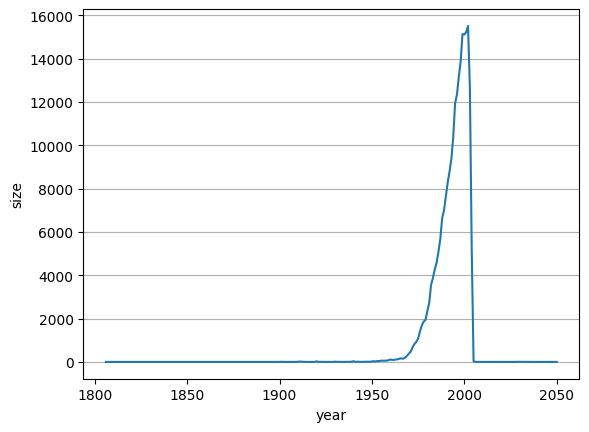

In [104]:
time_series_df= (
    tweaked_books_df
    .groupby(tweaked_books_df["year"].dt.year, as_index= False)
    .size()
)

sns.lineplot(data= time_series_df, x= "year", y= "size")
plt.grid(True, axis= "y")
plt.show()

##### 1. Why did you pick the specific chart?

The time series line plot is an appropriate choice for visualizing the trend in the number of books published over different years. This type of chart is effective in showing how a variable (in this case, the number of books) changes over time.

##### 2. What is/are the insight(s) found from the chart?

> The number of books published started to rise exponentially since 1950.  
> Before 1950, the line is relatively flat, indicating a lower number of books being published.  
> The dataset includes the oldest book from 1806, suggesting a historical range in the publication years.  
  
##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight about the exponential rise in the number of books published since 1950 could be valuable for businesses. It suggests a potential market growth and increased opportunities for book-related services. There isn't a clear indication of negative growth in this specific chart. However, if there were a significant drop in the number of books published in recent years, it might raise concerns about the health of the publishing industry. Since your plot doesn't show this, it seems the industry is experiencing positive growth.

#### Chart - 2
> Bar Chart - Top 10 Authors by Number of Books

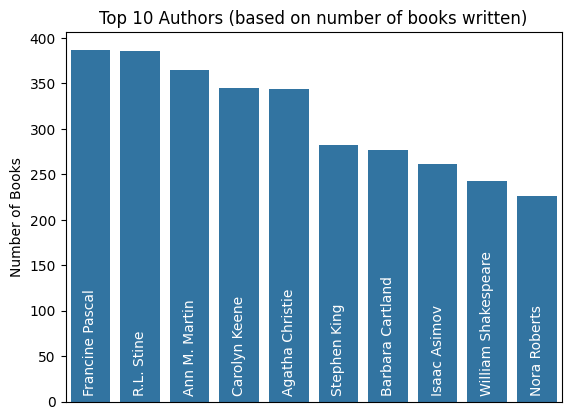

In [34]:
top_ten_authors= (
    tweaked_books_df
    .groupby(["author"], as_index= False)
    .size()
    .sort_values("size", ascending= False, ignore_index= True)
    .iloc[:10]
)

sns.barplot(
    data= top_ten_authors,
    x= "author", y= "size",
    color= "#1f77b4"
)

plt.tick_params(bottom = False) 

plt.xticks(rotation= "vertical", position= (0.0, 0.05), color= "white",
           horizontalalignment= "center", verticalalignment= "baseline")

plt.title("Top 10 Authors (based on number of books written)")
plt.xlabel(None)
plt.ylabel("Number of Books")

plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is a suitable choice for displaying the number of books written by different authors. It provides a clear visual comparison of the book counts for the top authors.

##### 2. What is/are the insight(s) found from the chart?

> Francine Pascal is the author with the most books, followed by R.L. Stine, Ann M. Martin, Carolyn Keene, and Agatha Christie.  
> All of these top authors have over 300 books to their name.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the top authors and the number of books they've written can be valuable for marketing and collaborations. It allows for targeted promotions and partnerships with prolific authors who have a significant readership. The insights from this chart don't directly suggest negative growth. However, if there were a sudden decline in the number of books written by these top authors, it might raise concerns about the sustained popularity of their work. Since your plot doesn't show this, it seems these authors continue to be prolific.  

#### Chart - 3
> Bar Chart - Top 10 Publishers by Number of Books

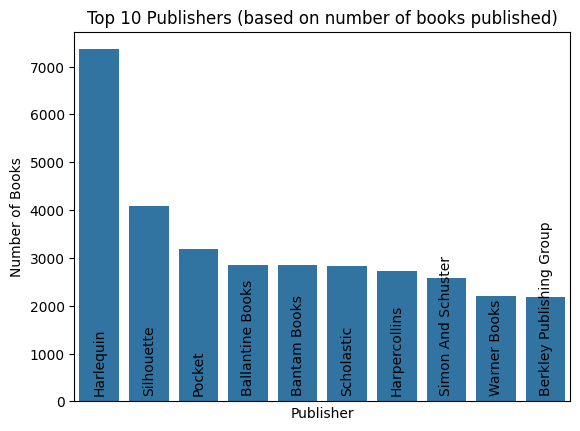

In [35]:
top_ten_publishers= (
    tweaked_books_df
    .groupby(["publisher"], as_index= False)
    .size()
    .sort_values("size", ascending= False, ignore_index= True)
    .iloc[:10]
)

sns.barplot(
    data= top_ten_publishers,
    x= "publisher", y= "size",
    color= "#1f77b4"
)
plt.tick_params(bottom = False)
plt.xticks(rotation= "vertical", position= (0.0, 0.05), #color= "white",
           horizontalalignment= "center", verticalalignment= "baseline")
plt.xlabel("Publisher")
plt.ylabel("Number of Books")
plt.title("Top 10 Publishers (based on number of books published)")
plt.show()

##### 1. Why did you pick the specific chart?

Similar to the top authors chart, the bar chart is a suitable choice for displaying the number of books published by different publishers. It provides a clear comparison of the book counts for the top publishers.  

##### 2. What is/are the insight(s) found from the chart?

> Harlequin is the publisher with the most books published, followed by Silhouette and Pocket. Also to note, is the fact that Harlequin has published almost twice the number of books published by the second-ranked publisher.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the top publishers and the number of books they've published can be crucial for business decisions. It can guide marketing strategies, partnerships, and inventory management. The insights from this chart don't indicate negative growth. However, if there were a significant drop in the number of books published by the top publishers, it might signal challenges in the publishing industry or a shift in market dynamics. Since your plot doesn't show this, it seems these publishers continue to be prolific.  

#### Chart - 4
> Pie Chart - Proportion of Ratings by Active/Not-so active Users

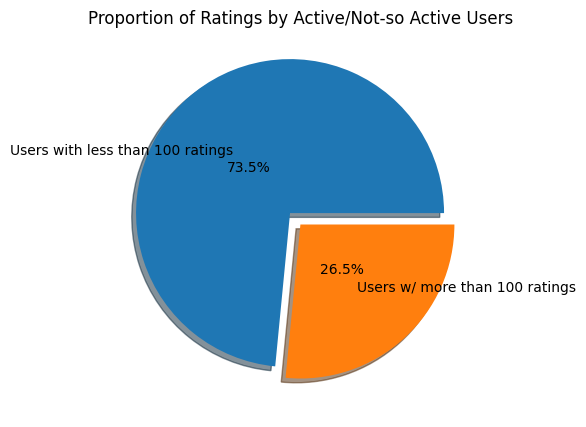

In [36]:
#percentage of ratings by active users compared to non-active users
ratings_by_active_users= (
    pd.merge(
        tweaked_ratings_df, user_ratings_df,
        how= "left", on= "id"
    )
    .groupby("is_active", as_index= False)
    .size()
)


fig= plt.figure(figsize= (5, 5))
plt.pie(
    data= ratings_by_active_users,
    x= "size", #labels= "is_active", 
    explode= (0.1, 0), shadow= True,
    autopct='%1.1f%%', pctdistance= 0.4,
    labels= [f"Users with less than {min_ratings} ratings", f"Users w/ more than {min_ratings} ratings"],
    labeldistance= 0.55
)

plt.title("Proportion of Ratings by Active/Not-so Active Users")
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is an effective choice for illustrating proportions and percentages. It provides a clear visual representation of the distribution of active and not-so active users.  

##### 2. What is/are the insight(s) found from the chart?

> Users with more than 100 ratings constitute roughly 27% of the total users.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the proportion of highly active users can guide business strategies. These users, who contribute significantly to the ratings, may be considered key influencers. Targeting them for promotions, surveys, or feedback collection could lead to better engagement and customer satisfaction.    

#### Chart - 5
> Pareto Chart & Bar Chart- Contribution of Ratings by Users

In [9]:
# Sort the DataFrame by ratings in descending order
def get_pareto_df(X, variable):

    def extract_meta(Y):
        globals()["num_class"]= Y.shape[0]
        globals()["total_size"]= Y["size"].sum()
        bin_range= np.round(np.linspace(0, num_class, num = 11), 2)
        globals()["bins"]= pd.cut(Y["index"], bins= bin_range, include_lowest= True)
        return Y


    return (
        X
        .groupby(variable, as_index= False)
        .size()
        .sort_values("size", ascending= False, ignore_index= True)
        .reset_index()
        .pipe(extract_meta)
        .groupby(bins, observed= False)
        .agg({"size": "sum"})
        .reset_index()
        .assign(
            cumperc= lambda x: np.round((x["size"].cumsum()/total_size)*100, 2),
            perc_users= lambda x: np.round((pd.IntervalIndex(x["index"]).right/num_class)*100, 2)
        )
    )

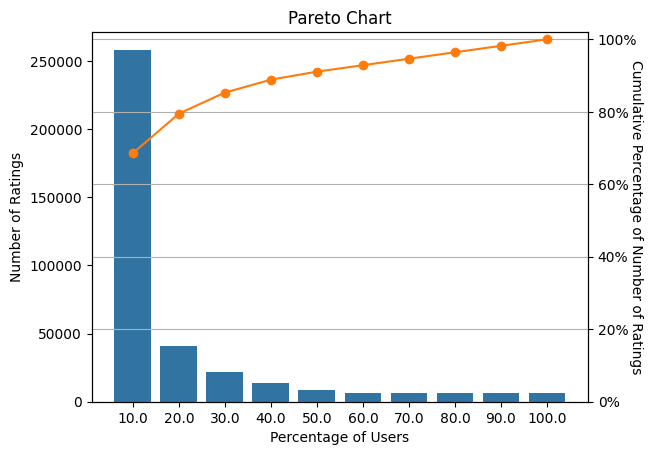

In [10]:
contribution_by_id= get_pareto_df(tweaked_ratings_df, variable= "id")

fig, ax= plt.subplots(sharex= True)
sns.barplot(data= contribution_by_id, x= "perc_users", y= "size", 
            color= "#1f77b4", ax= ax)
ax.set_xlabel("Percentage of Users")
ax.set_ylabel("Number of Ratings")

ax2= ax.twinx()
ax2.plot(contribution_by_id["cumperc"], marker= "o", color= "#ff7c0c")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim(0,102)
ax2.set_ylabel("Cumulative Percentage of Number of Ratings", rotation= 270)

plt.grid(True, zorder= 0)
plt.title("Pareto Chart")
plt.show()

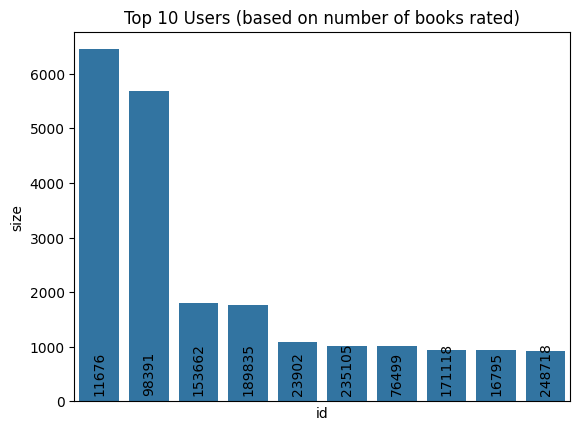

In [39]:
#id which made the most contribution
top_ten_ids= (
    tweaked_ratings_df
    .groupby("id", as_index= False)
    .size()
    .sort_values("size", ascending= False)
    [:10]
)


sns.barplot(
    data= top_ten_ids, y= "size", x= "id", 
    order= top_ten_ids["id"],
    color= "#1f77b4"
)

plt.xticks(
    rotation= "vertical", position= (0.0, 0.05),
    horizontalalignment= "center", verticalalignment= "baseline"
)
plt.tick_params(bottom = False) 
plt.title("Top 10 Users (based on number of books rated)")
plt.show()

##### 1. Why did you pick the specific chart?

The Pareto chart is chosen because it's a useful visualization for identifying the significant contributors to a dataset. In this case, it helps to show the distribution of ratings among users.  

##### 2. What is/are the insight(s) found from the chart?

> The insight gained from the Pareto chart is that 20% of the top users contribute 80% of the total ratings. This is a common observation in many systems following the Pareto principle, also known as the 80/20 rule.  
> User 11676 has the rated the most number of books, with 98391 close behind. 
 
##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that a small percentage of users contribute a significant portion of ratings is valuable. Businesses can focus their efforts on engaging and retaining these top contributors. Tailoring recommendations or offering incentives to this user segment could enhance overall user satisfaction and engagement.  

#### Chart - 6
> Pareto Chart & Geographic Map - Distribution of Users Across Countries

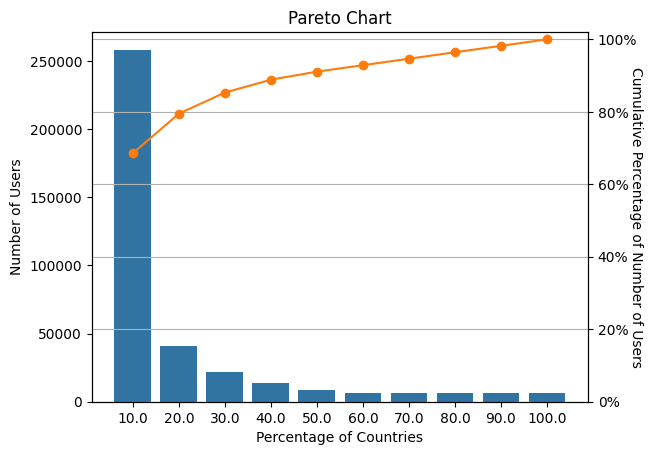

In [105]:
contribution_by_country= get_pareto_df(tweaked_ratings_df, variable= "id")

fig, ax= plt.subplots(sharex= True)
sns.barplot(data= contribution_by_country, x= "perc_users", y= "size", 
            color= "#1f77b4", ax= ax)

# ax.set_xlim(10,100)
ax.set_xlabel("Percentage of Countries")
ax.set_ylabel("Number of Users")

ax2= ax.twinx()
ax2.plot(contribution_by_country["cumperc"], marker= "o", color= "#ff7c0c")
# ax2.xaxis.set_major_formatter(PercentFormatter())
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim(0,102)
ax2.set_ylabel("Cumulative Percentage of Number of Users", rotation= 270)

ax2.grid(True, zorder= -1)
plt.title("Pareto Chart")
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
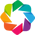

:Polygons   [Longitude,Latitude]   (size,name)

In [41]:
#geo map of users
users_by_countries= gpd.GeoDataFrame(
    pd.merge(
        (
            tweaked_users_df
            .groupby(["country"], as_index= False)
            .size()
        ), 
        country, 
        left_on= "country", right_on= "name", 
        how= "right"
    )
    .assign(
        name= lambda x: x["name"].str.title()
    )
    .drop(columns= ["iso2", "iso3", "country", "lon", "lat"])
    .fillna(0),
    #specifying geometry column
    geometry='geometry'
)

#initializing gv for notebooks
gv.extension('bokeh')

#creating a world map and plotting the 
gv.Polygons(
    users_by_countries, 
    vdims=[
        ('size', "Number of Users"), ('name', "Country"), 
    ]
).opts(
    tools= ["hover"], width= 800, height= 500, 
    projection= crs.Mercator(), 
    cmap= sns.diverging_palette(220, 20, as_cmap=True),
    title= 'Distribution of Users across Countries'
)

##### 1. Why did you pick the specific chart?

The Pareto chart is chosen to illustrate the distribution of users across different countries, highlighting the concentration of users in a small number of countries. This type of chart is effective for identifying key contributors to the user base.  
A geographic map effectively visualizes the distribution of users across different countries, providing a comprehensive overview.

##### 2. What is/are the insight(s) found from the chart?

> The Pareto chart reveals that 80% of the users are from just 20% of the countries. This suggests a concentration of users in a subset of countries.  
> The geographic map shows the distribution of users across countries, with the US having the most users (144,860), followed by Canada (\~21000), UK (\~19,000) and Germany (\~18,000).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the concentration of users in specific countries allows for targeted marketing, localization efforts, and customer engagement strategies. Focusing on these key countries can lead to more effective campaigns and user retention.   

#### Chart - 7
> Countplot- Distribution of Ratings

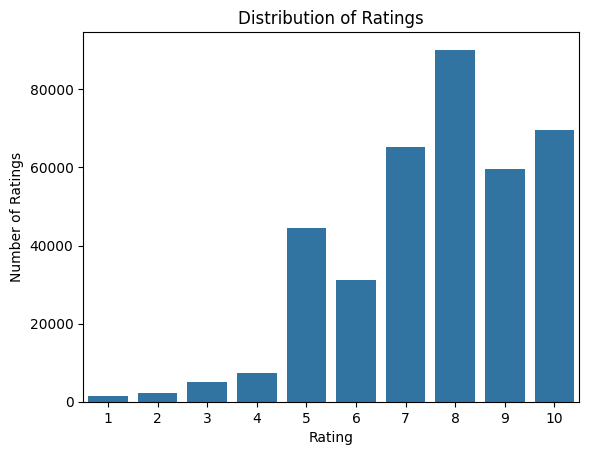

In [42]:
#countplot of ratings
sns.countplot(data= tweaked_ratings_df, x= "rating",
              color= "#1f77b4")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.title("Distribution of Ratings")
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is an effective choice for visualizing the distribution of ratings, providing a clear overview of the frequency of each rating category.

##### 2. What is/are the insight(s) found from the chart?

> 8 is the most frequent rating, followed by 10, 7, and 9.  
> Ratings below 5 are sparse, indicating that a majority of users give higher ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying the most frequent ratings allows for targeted analysis of content that receives high user appreciation. This information is valuable for recommending similar content and enhancing user satisfaction. The sparse distribution of ratings below 5 doesn't inherently suggest negative growth. However, monitoring any shifts in the distribution over time can help detect changes in user sentiment and potential issues with content quality.

#### Chart - 8
> Histogram & Boxplot- Distribution of User Ages

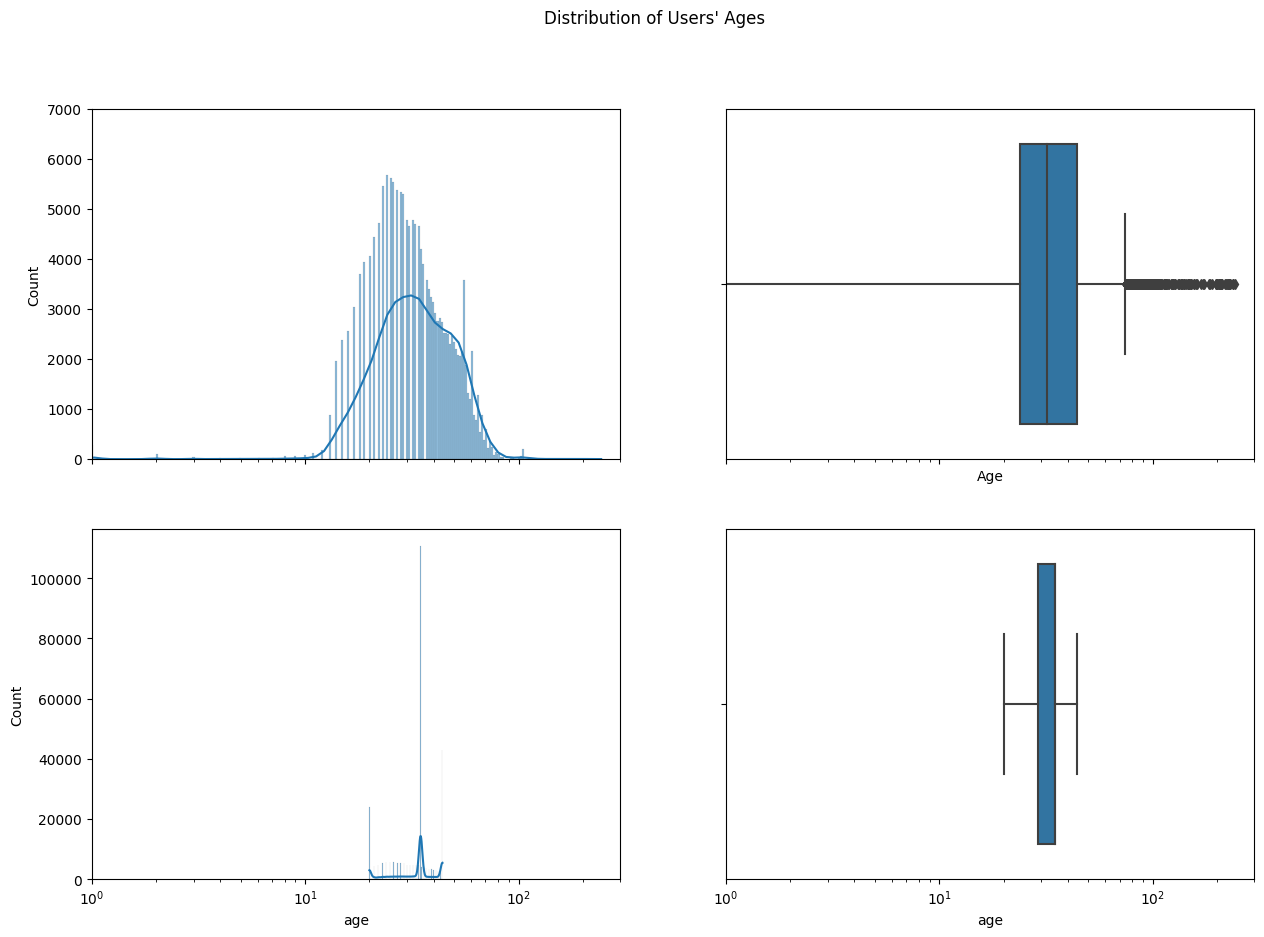

In [49]:
#age wise distribution of users
fig, ax= plt.subplots(2, 2, figsize= (15, 10), sharex= True)
ax= ax.flatten()

mean_age= users_df["Age"].mean()

sns.histplot(
    data= users_df["Age"].dropna().apply(lambda x: x+1e-5), 
    kde= True, log_scale= True, ax= ax[0]
)
ax[0].set_ylim(0, 7000)
ax[0].set_xlim(1, 300)
sns.boxplot(data= users_df.dropna(), x= "Age", ax= ax[1])

sns.histplot(
    data= tweaked_users_df["age"].apply(lambda x: x+1e-5), 
    kde= True, log_scale= True, ax= ax[2]
)
ax[2].set_ylim(auto= True)
ax[2].set_xlim(1, 300)
sns.boxplot(data= tweaked_users_df, x= "age", ax= ax[3])

fig.suptitle("Distribution of Users' Ages")
plt.show()

##### 1. Why did you pick the specific chart?

The histogram is chosen to visualize the distribution of user ages, providing insights into the frequency of different age groups.  
The boxplot is chosen to provide a summary of the distribution of user ages, including the median, quartiles, and identification of outliers. It is effective in visualizing the central tendency and variability of the age data.  

##### 2. What is/are the insight(s) found from the chart?

> The histogram shows the distribution of user ages, with a focus on log scale for better visibility.  
> The peak in the histogram indicates the most common age group among users.  
> The median age is between 25 and 35, indicating that the majority of users fall within this age range.  
> The presence of outliers on both sides of the graph suggests that there are users with ages significantly different from the majority.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of user ages allows for targeted content recommendations and marketing strategies tailored to specific age groups.  

#### Chart - 10
> Barplot- Top 10 most rated books

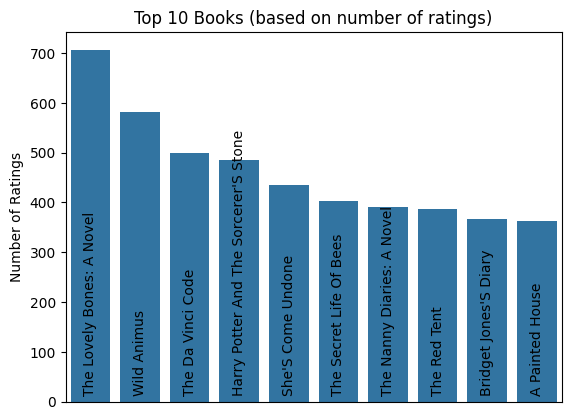

In [44]:
books_ratings_df= (
    tweaked_ratings_df
    .groupby("isbn", as_index= False)
    .size()
    .merge(
        tweaked_books_df,
        on= "isbn", how= "left"
    )
    .sort_values("size", ascending= False, ignore_index= True)
    [["title", "size"]]
    .iloc[:10]
)


sns.barplot(
    data= books_ratings_df,
    x= "title", y= "size",
    color= "#1f77b4"
)

plt.tick_params(bottom = False) 

plt.xticks(rotation= "vertical", position= (0.0, 0.05), #color= "white",
           horizontalalignment= "center", verticalalignment= "baseline")

plt.title("Top 10 Books (based on number of ratings)")
plt.xlabel(None)
plt.ylabel("Number of Ratings")

plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is a suitable choice for displaying the number of ratings for books.  

##### 2. What is/are the insight(s) found from the chart?

> The Lovely Bones: A Novel is the most rated books, followed by Wild Animus and The Da Vinci Code.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing which books receive the highest number of ratings can inform business strategies such as marketing, inventory management, and recommendations. It helps identify popular and well-received books, allowing for targeted promotional efforts and improved user experience.

## ***5. Hypothesis Testing***  
### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
# Set significance level
alpha = 0.05

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: User age has no significant impact on user engagement (number of ratings).  
Alternative Hypothesis: Users of different age groups significantly differ in their levels of engagement.

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value

bin_range= np.round(np.linspace(tweaked_users_df["age"].min(), tweaked_users_df["age"].max(), num = 11), 2)
bins= pd.cut(tweaked_users_df["age"], bins= bin_range, include_lowest= True)

age_ratings_df= (
    tweaked_users_df
    .groupby([bins], observed= False)
    .agg({"num_ratings": list})
    .reset_index()
)

f_statistic, p_value = f_oneway(*age_ratings_df["num_ratings"])

# Print results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis: User age has a significant impact on user engagement.")
else:
    print("Fail to reject the null hypothesis: User age does not have a significant impact on user engagement.")

F-statistic: 12.892185768019104
P-value: 8.757574960372032e-21
Reject the null hypothesis: User age has a significant impact on user engagement.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: User age is not associated with their location.  
Alternative Hypothesis: User age is associated with their location.  

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value

bin_range= np.round(np.linspace(tweaked_users_df["age"].min(), tweaked_users_df["age"].max(), num = 11), 2)
bins= pd.cut(tweaked_users_df["age"], bins= bin_range, include_lowest= True)

age_country_df= tweaked_users_df.groupby([bins, "country"], observed= False, as_index= False).size()

# Create a contingency table
contingency_table = pd.crosstab(age_country_df['age'], age_country_df['country'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Compare p-value with significance level
if p < alpha:
    print("Reject the null hypothesis: User age and location are associated.")
else:
    print("Fail to reject the null hypothesis: User age and location are independent.")

Chi-squared statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis: User age and location are independent.




##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 8. Data Splitting

In [44]:
most_rated_books= (
    tweaked_ratings_df
    .groupby("isbn", as_index= False)
    .size()
    .query("size> 50")
    ["isbn"]
    .tolist()
)
most_rated_books[:10]

['002542730X',
 '0060008024',
 '0060086246',
 '0060096195',
 '0060168013',
 '006016848X',
 '0060173289',
 '0060175400',
 '0060199652',
 '0060392452']

In [46]:
active_users= (
    tweaked_ratings_df
    .query('isbn in @most_rated_books')
    .groupby('id', as_index= False)
    .size()
    .query('size>= 10')
    ["id"]
    .unique()
    .tolist()
)
active_users[:10]

[243, 254, 638, 805, 1131, 1435, 2276, 2766, 2891, 3167]

In [47]:
id_isbn_df= (
    tweaked_ratings_df
    .query("isbn in @most_rated_books")
    .query("id in @active_users")
    [["id", "isbn", "rating"]]
    .reset_index(drop= True)
    .assign(
        rating= lambda x: np.log(x["rating"])
    )
)
id_isbn_df.head()

id        isbn    rating
0  243  0060915544  2.302585
1  243  0060977493  1.945910
2  243  0316601950  2.197225
3  243  0316776963  2.197225
4  243  0316899984  1.945910

In [48]:
id_isbn_df.shape

(24676, 3)

In [49]:
id_isbn_df.groupby('id').size().sort_values()

id
243        10
189558     10
53729      10
55075      10
184279     10
         ... 
140358     81
60244      99
95359     129
16795     146
11676     502
Length: 1234, dtype: int64

In [50]:
train_id_isbn_df, test_id_isbn_df= train_test_split(
    id_isbn_df, 
    stratify= id_isbn_df["id"],
    test_size= 0.20,
    random_state= 42    
)
train_id_isbn_df.head()

id        isbn    rating
2658    26057  0385484518  2.302585
16906  187762  0670855030  2.079442
668      8253  059035342X  2.079442
11862  128696  0385420161  2.197225
21769  243759  0375411550  2.079442

In [41]:
train_df= (
    train_id_isbn_df
    .pivot(
        index= "isbn",
        columns= "id",
        values= "rating"
    )
    .fillna(0)
)
train_df.head()

id          243     254     638     805     1131    1435    2276    2766    \
isbn                                                                         
002542730X     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
0060008024     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
0060086246     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
0060096195     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
0060168013     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

id          2891    3167    ...  274393  275154  275970  276050  276165  \
isbn                        ...                                           
002542730X     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
0060008024     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
0060086246     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
0060096195     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
0060168013     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   

id          276231  276680    277427  278026  278633  
isbn                                                  
002542730X     0.0     0.0  2.302585     0.0     0.0  
0060008024     0.0     0.0  0.000000     0.0     0.0  
0060086246     0.0     0.0  0.000000     0.0     0.0  
0060096195     0.0     0.0  0.000000     0.0     0.0  
0060168013     0.0     0.0  0.000000     0.0     0.0  

[5 rows x 1234 columns]

In [64]:
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100
class ModelEvaluator:
    
    def __init__(self, model, cf_predictions_df, preset= True):
        self.model= model
        self.cf_predictions_df= cf_predictions_df
        self.preset= preset
        
    
    def get_interacted_books(self, user_id):

        return (
            id_isbn_df
            .query("id== @user_id")
            ["isbn"]
            .unique()
            .tolist()
        )
    

    def get_n_non_interacted_books(self, user_id, sample_size, seed= 42):

        interacted_books= get_interacted_books(user_id)
        all_books= id_isbn_df["isbn"].unique().tolist()
        non_interacted_books= list(filter(lambda x: x not in interacted_books, all_books))
        return  (
            np.random.default_rng(seed= seed)
            .choice(non_interacted_items, sample_size)
            .tolist()
        )

    def get_test_books_for_user(self, user_id):
        
        li= (
            test_id_isbn_df
            .query("id== @user_id")
            ["isbn"]
            .tolist()
        )
        return li, len(li)
    

    def get_cf_matrix_for_user(self, user_id):

        books_for_user= get_interacted_books(user_id)+ get_n_non_interacted_books(user_id= 638, sample_size= EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS)
        
        return (
            self.cf_predictions_df
            .loc[books_for_user, books_for_user]
        )
    

    def hit_at_n(self, test_books, recommended_books):
        return len(list(filter(lambda x: x in test_books, recommended_books)))
    

    def evaluate_model_for_user(self, user_id):  

        test_books_for_user, total_test_books= self.get_test_books_for_user(user_id)

        if not self.preset:
            user_matrix= self.get_cf_matrix_for_user(user_id)
            self.cf_recommender_model = self.model(user_matrix, train_id_isbn_df)

        top5_recommended_books= self.cf_recommender_model.recommend_books(user_id= user_id, topn= 5)["isbn"].tolist()
        top10_recommended_books= self.cf_recommender_model.recommend_books(user_id= user_id, topn= 10)["isbn"].tolist()


        hits_at_5= hit_at_n(test_books_for_user, top5_recommended_books)
        hits_at_10= hit_at_n(test_books_for_user, top10_recommended_books)


        recall_at_5= hits_at_5/ total_test_books
        recall_at_10= hits_at_10/ total_test_books

        return {
            "id": user_id,
            "num_hits@5": hits_at_5,
            "num_hits@10": hits_at_10,
            "interacted_counts": total_test_books,
            "recall@5": recall_at_5,
            "recall@10": recall_at_10
        }

    def evaluate_model(self):
        people_metrics= []
        
        if self.preset:
            self.cf_recommender_model= self.model(self.cf_predictions_df, train_id_isbn_df)
        
        for user_id in tqdm(id_isbn_df["id"].unique()):
            people_metrics.append(self.evaluate_model_for_user(user_id))

        detailed_results_df= pd.DataFrame(people_metrics).sort_values('interacted_counts', ascending=False)
        global_recall_at_5= detailed_results_df["num_hits@5"].sum()/detailed_results_df['interacted_counts'].sum()
        global_recall_at_10= detailed_results_df["num_hits@10"].sum()/detailed_results_df['interacted_counts'].sum()

        global_metrics= {
                    "model_name": self.model.model_name,
                    'recall@5': np.round(global_recall_at_5, 2),
                    'recall@10': np.round(global_recall_at_10, 2)
                }

        return detailed_results_df, global_metrics

## ***7. ML Model Implementation***

### ML Model - 1
> Popularity Based Recommendations  
  
    
 $ \text{Weighted Rating (WR)} = \left( \frac{v}{v+m} \right) \cdot R + \left( \frac{m}{v+m} \right) \cdot C $   
   
 where,  
 v= num of votes,  
 m= min num of votes required to be listed in the Top 50, 100  
 R= mean book rating,  
 C= mean vote across the whole report,  

In [43]:
def calc_weighted_rating(X, Y, min_votes= 100):
    
    def extract_mean_report_rating(Z):
        globals()["mean_report_rating"]= Y["rating"].mean()
        return Z
    
    return (
        pd.merge(
            X[["isbn", "title", "author"]], Y[["isbn", "rating", "id"]], 
            on= "isbn", how= "right"
        )
        .dropna()
        .pipe(extract_mean_report_rating)
        .groupby(["isbn", "title", "author"], as_index= False)
        .agg({"rating": "mean", "id": "count"})
        .rename(columns= {"rating": "avg_rating", "id": "num_votes"})
        .assign(
            weighted_rating= lambda x: (
                np.round(
                    (x["num_votes"]/(x["num_votes"]+ min_votes))*x["avg_rating"] + (min_votes/(min_votes+ x["num_votes"]))* mean_report_rating,
                    2
                )
            )
        )
        .sort_values("weighted_rating", ascending= False)
        .reset_index(drop= True)
        [["isbn", "title", "author", "weighted_rating"]]
    )

In [44]:
top_50_popular_books= calc_weighted_rating(tweaked_books_df, tweaked_ratings_df).loc[:50]
top_50_popular_books#.head(50)

isbn                                              title  \
0   059035342X              Harry Potter And The Sorcerer'S Stone   
1   0439139597                Harry Potter And The Goblet Of Fire   
2   0439136350           Harry Potter And The Prisoner Of Azkaban   
3   0446310786                              To Kill A Mockingbird   
4   043935806X          Harry Potter And The Order Of The Phoenix   
5   0439064872            Harry Potter And The Chamber Of Secrets   
6   0345339738                             The Return Of The King   
7   0312853238                                       Ender'S Game   
8   0156528207                                  The Little Prince   
9   055321215X                                Pride And Prejudice   
10  0345272595                                     The Two Towers   
11  0345339703                         The Fellowship Of The Ring   
12  0451524934                                               1984   
13  0385484518  Tuesdays With Morrie: An Old Man A Young Man A...   
14  055321313X                               Anne Of Green Gables   
15  0345339711                                     The Two Towers   
16  0345339681  The Hobbit : The Enchanting Prelude To The Lor...   
17  0395272238                         The Fellowship Of The Ring   
18  0385504209                                  The Da Vinci Code   
19  0142001740                            The Secret Life Of Bees   
20  0440219078                                          The Giver   
21  0441172660                                               Dune   
22  0440998050                                  A Wrinkle In Time   
23  0064400557                                    Charlotte'S Web   
24  0345361792                            A Prayer For Owen Meany   
25  3257208626                                     Fahrenheit 451   
26  0064471047                The Lion The Witch And The Wardrobe   
27  0671617028                                   The Color Purple   
28  0345348036  The Princess Bride: S Morgenstern'S Classic Ta...   
29  0375823468                                   The Subtle Knife   
30  0451518845                                          Jane Eyre   
31  0380002930                                     Watership Down   
32  0070212570      Fried Green Tomatoes At The Whistle Stop Cafe   
33  0395177111                                         The Hobbit   
34  0671461494               The Hitchhiker'S Guide To The Galaxy   
35  0345272609                             The Return Of The King   
36  0374332657                                              Holes   
37  0316666343                          The Lovely Bones: A Novel   
38  193156146X                           The Time Traveler'S Wife   
39  0812505018                                  The Secret Garden   
40  0671032658                                     The Green Mile   
41  0064405052                              The Magician'S Nephew   
42  0449005615                     Seabiscuit: An American Legend   
43  0671623249                                      Lonesome Dove   
44  0440222915                                          Outlander   
45  0553296981              Anne Frank: The Diary Of A Young Girl   
46  0060938455  Fast Food Nation: The Dark Side Of The Allamer...   
47  0385199570                                          The Stand   
48  0345350499                                The Mists Of Avalon   
49  037582345X                                 The Golden Compass   
50  0877017883  Griffin And Sabine: An Extraordinary Correspon...   

                      author  weighted_rating  
0               J.K. Rowling             8.74  
1               J.K. Rowling             8.69  
2               J.K. Rowling             8.67  
3                 Harper Lee             8.61  
4               J.K. Rowling             8.60  
5               J.K. Rowling             8.56  
6             J.R.R. Tolkien             8.42  
7           Orson Scott Card         

### ML Model - 2
> Memory Based Collaborative Filtering

In [42]:
train_df.shape

(667, 1234)

In [69]:
def calculate_cosine_similarity_matrix(df):
    
    matrix, isbns= df.values, df.index
    
    similarity_scores= cosine_similarity(matrix)
    
    return pd.DataFrame(similarity_scores, columns= isbns, index= isbns)

In [70]:
cf_pred_df= calculate_cosine_similarity_matrix(train_df)
cf_pred_df

isbn        002542730X  0060008024  0060086246  0060096195  0060168013  \
isbn                                                                     
002542730X    1.000000    0.052230    0.000000    0.000000    0.065503   
0060008024    0.052230    1.000000    0.246409    0.079089    0.050151   
0060086246    0.000000    0.246409    1.000000    0.000000    0.000000   
0060096195    0.000000    0.079089    0.000000    1.000000    0.047188   
0060168013    0.065503    0.050151    0.000000    0.047188    1.000000   
...                ...         ...         ...         ...         ...   
193156146X    0.040122    0.058311    0.048523    0.000000    0.106867   
3257208626    0.055519    0.038680    0.000000    0.000000    0.052557   
346202261X    0.000000    0.000000    0.000000    0.065767    0.083836   
3548603203    0.127835    0.199591    0.077222    0.000000    0.065391   
8472237443    0.099038    0.137227    0.000000    0.000000    0.072895   

isbn        006016848X  0060173289  0060175400  0060199652  0060392452  ...  \
isbn                                                                    ...   
002542730X    0.050390    0.000000    0.088502    0.000000    0.070750  ...   
0060008024    0.149979    0.087704    0.061033    0.072421    0.000000  ...   
0060086246    0.000000    0.000000    0.000000    0.000000    0.000000  ...   
0060096195    0.000000    0.000000    0.054800    0.000000    0.038915  ...   
0060168013    0.083824    0.000000    0.149293    0.041233    0.060835  ...   
...                ...         ...         ...         ...         ...  ...   
193156146X    0.056256    0.060843    0.089224    0.000000    0.069799  ...   
3257208626    0.073912    0.038513    0.058871    0.031802    0.049456  ...   
346202261X    0.000000    0.000000    0.098575    0.080205    0.000000  ...   
3548603203    0.052215    0.059180    0.043516    0.097735    0.064593  ...   
8472237443    0.066568    0.000000    0.105018    0.000000    0.000000  ...   

isbn        1592400876  1841219266  185326041X  1853262714  1878424319  \
isbn                                                                     
002542730X    0.040848    0.058091    0.057357    0.104590    0.000000   
0060008024    0.115549    0.084426    0.038582    0.064467    0.000000   
0060086246    0.043750    0.000000    0.000000    0.000000    0.000000   
0060096195    0.000000    0.000000    0.000000    0.000000    0.000000   
0060168013    0.039221    0.055778    0.025490    0.042592    0.000000   
...                ...         ...         ...         ...         ...   
193156146X    0.086787    0.064854    0.029638    0.049522    0.000000   
3257208626    0.095448    0.088477    0.107079    0.052528    0.024757   
346202261X    0.000000    0.000000    0.071586    0.000000    0.000000   
3548603203    0.042327    0.060195    0.027509    0.045964    0.000000   
8472237443    0.053963    0.076742    0.078920    0.124026    0.034366   

isbn        193156146X  3257208626  346202261X  3548603203  8472237443  
isbn                                                                    
002542730X    0.040122    0.055519    0.000000    0.127835    0.099038  
0060008024    0.058311    0.038680    0.000000    0.199591    0.137227  
0060086246    0.048523    0.000000    0.000000    0.077222    0.000000  
0060096195    0.000000    0.000000    0.065767    0.000000    0.000000  
0060168013    0.106867    0.052557    0.083836    0.065391    0.072895  
...                ...         ...         ...         ...         ...  
193156146X    1.000000    0.059672    0.000000    0.080922    0.094028  
3257208626    0.059672    1.000000    0.035616    0.027578    0.109844  
346202261X    0.000000    0.035616    1.000000    0.015721    0.000000  
3548603203    0.080922    0.027578    0.015721    1.000000    0.095234  
8472237443    0.094028    0.109844    0.000000    0.095234    1.000000  

[667 rows x 667 columns]

In [43]:
similarity_scores = cosine_similarity(train_df)

isbns= train_df.index
cf_pred_df= pd.DataFrame(similarity_scores, columns= isbns, index= isbns)
cf_pred_df.head()

isbn        002542730X  0060008024  0060086246  0060096195  0060168013  \
isbn                                                                     
002542730X    1.000000    0.052230    0.000000    0.000000    0.065503   
0060008024    0.052230    1.000000    0.246409    0.079089    0.050151   
0060086246    0.000000    0.246409    1.000000    0.000000    0.000000   
0060096195    0.000000    0.079089    0.000000    1.000000    0.047188   
0060168013    0.065503    0.050151    0.000000    0.047188    1.000000   

isbn        006016848X  0060173289  0060175400  0060199652  0060392452  ...  \
isbn                                                                    ...   
002542730X    0.050390    0.000000    0.088502    0.000000    0.070750  ...   
0060008024    0.149979    0.087704    0.061033    0.072421    0.000000  ...   
0060086246    0.000000    0.000000    0.000000    0.000000    0.000000  ...   
0060096195    0.000000    0.000000    0.054800    0.000000    0.038915  ...   
0060168013    0.083824    0.000000    0.149293    0.041233    0.060835  ...   

isbn        1592400876  1841219266  185326041X  1853262714  1878424319  \
isbn                                                                     
002542730X    0.040848    0.058091    0.057357    0.104590         0.0   
0060008024    0.115549    0.084426    0.038582    0.064467         0.0   
0060086246    0.043750    0.000000    0.000000    0.000000         0.0   
0060096195    0.000000    0.000000    0.000000    0.000000         0.0   
0060168013    0.039221    0.055778    0.025490    0.042592         0.0   

isbn        193156146X  3257208626  346202261X  3548603203  8472237443  
isbn                                                                    
002542730X    0.040122    0.055519    0.000000    0.127835    0.099038  
0060008024    0.058311    0.038680    0.000000    0.199591    0.137227  
0060086246    0.048523    0.000000    0.000000    0.077222    0.000000  
0060096195    0.000000    0.000000    0.065767    0.000000    0.000000  
0060168013    0.106867    0.052557    0.083836    0.065391    0.072895  

[5 rows x 667 columns]

In [44]:
class MemoryBased_CFRecommender:
    
    model_name= "Memory Base Collaborative Filtering"
    
    def __init__(self, cf_predictions_df, train_books_df, books_df= None):
        self.cf_predictions_df = cf_predictions_df
        self.train_books_df= train_books_df
        self.books_df = books_df
        
    def get_train_user_interacted_books(self, user_id):

        return (
            self.train_books_df
            .query("id== @user_id")
            ["isbn"]
            .tolist()
        )
    
    def recommend_books(self, user_id, topn=10, verbose=False):
        
        books_liked_by_user= self.get_train_user_interacted_books(user_id)

        recommendations_df= (
            self.cf_predictions_df
            [books_liked_by_user]
            .drop(index= books_liked_by_user)
            .assign(
                recStrength= lambda x: np.sum(x, axis= 1)
            )
            .sort_values('recStrength', ascending= False)
            .iloc[:topn]
            .reset_index()
            [["isbn", "recStrength"]]
        )
        
        if verbose:
            if self.books_df is None:
                raise Exception('"books_df" is required in verbose mode')

            recommendations_df = (
                recommendations_df
                .merge(
                    self.books_df, how = 'left', 
                    on = 'isbn'
                )
                [['recStrength', 'isbn', 'title', 'author']]
            )
        
        
        return recommendations_df
        

In [65]:
model_evaluator= ModelEvaluator(MemoryBased_CFRecommender, cf_pred_df, preset= False)
print('Evaluating Collaborative Filtering (Cosine Similarity Matrix) model...')
cf_detailed_results_df, cf_global_metrics = model_evaluator.evaluate_model()

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (Memory Based) model...


100%|██████████| 1234/1234 [00:28<00:00, 42.64it/s]


Global metrics:
{'model_name': 'Memory Base Collaborative Filtering', 'recall@5': 0.27, 'recall@10': 0.4}


id  num_hits@5  num_hits@10  interacted_counts  recall@5  recall@10
42    11676           5           10                101  0.049505   0.099010
65    16795           5            8                 29  0.172414   0.275862
416   95359           2            5                 26  0.076923   0.192308
259   60244           1            2                 20  0.050000   0.100000
680  153662           4            6                 16  0.250000   0.375000
459  104636           4            6                 16  0.250000   0.375000
837  189835           5            7                 16  0.312500   0.437500
620  140358           4            4                 16  0.250000   0.250000
389   89602           1            2                 16  0.062500   0.125000
700  158295           3            6                 16  0.187500   0.375000

### ML Model - 3 
> Model Based Collaborative Filtering

In [73]:
def get_dense_matrix(df):
    
    matrix, isbns, ids= df.values, df.index, df.columns
    
    U, sigma, Vt= np.linalg.svd(matrix, full_matrices= False)
    sigma= np.diag(sigma)
    
    x=  U @ sigma @ Vt
    
    return pd.DataFrame(x, columns = ids, index=isbns)
    

In [74]:
cf_preds_df = get_dense_matrix(train_df)
cf_preds_df.head()

id                243           254           638           805     \
isbn                                                                 
002542730X  3.989864e-16 -4.267420e-16 -2.609024e-15  3.053113e-16   
0060008024 -1.743397e-16 -1.595946e-15  2.345346e-15  7.910339e-16   
0060086246  3.955170e-16 -9.159340e-16  7.216450e-16  3.608225e-16   
0060096195  3.885781e-16 -1.061651e-15  1.896053e-15 -6.938894e-17   
0060168013  1.970646e-15 -2.081668e-15  1.117162e-15  4.857226e-16   

id                1131          1435          2276          2766    \
isbn                                                                 
002542730X -7.008283e-16  1.804112e-15 -1.304512e-15 -4.996004e-16   
0060008024  4.093947e-16  9.610368e-16  9.992007e-16  1.925543e-15   
0060086246 -8.847090e-17  5.117434e-16  3.053113e-16 -9.922618e-16   
0060096195  5.689893e-16 -3.087808e-16 -2.914335e-16 -3.885781e-16   
0060168013  1.859624e-15  1.790235e-15 -1.401657e-15 -1.005706e-15   

id                2891          3167    ...        274393        275154  \
isbn                                    ...                               
002542730X  4.336809e-17 -1.026956e-15  ...  7.754214e-16 -5.273559e-16   
0060008024  7.077672e-16 -7.216450e-16  ...  1.755540e-15  7.459311e-16   
0060086246 -2.324529e-16  1.249001e-15  ... -1.085937e-15  2.053913e-15   
0060096195 -4.007211e-16  2.983724e-16  ...  1.120631e-15  7.962381e-16   
0060168013  1.863093e-15 -2.775558e-16  ...  8.534840e-16  1.002670e-15   

id                275970        276050        276165        276231  \
isbn                                                                 
002542730X -2.282896e-15 -1.916869e-16 -2.456368e-15 -1.089406e-15   
0060008024  3.122502e-17 -1.970646e-15  1.169204e-15  4.510281e-17   
0060086246  1.387779e-16  1.383984e-16  1.110223e-16 -8.881784e-16   
0060096195  7.181755e-16 -1.200429e-15  2.567391e-16 -2.081668e-16   
0060168013 -8.153200e-16 -8.326673e-16 -1.659046e-15  6.036838e-16   

id                276680        277427        278026        278633  
isbn                                                                
002542730X  1.432882e-15  2.302585e+00  4.024558e-16 -3.080869e-15  
0060008024 -2.192690e-15  1.769418e-15  3.608225e-16 -7.771561e-16  
0060086246 -1.110223e-16  8.326673e-17  3.469447e-16 -8.396062e-16  
0060096195 -1.110223e-16  1.068590e-15 -9.195661e-16  8.300652e-16  
0060168013  1.540434e-15  2.382643e-15  2.286366e-15  2.574330e-15  

[5 rows x 1234 columns]

In [75]:
cf_preds_df.shape

(667, 1234)

In [38]:
class ModelBased_CFRecommender:
    
    model_name= "Model Based Collaborative Filtering"
    
    def __init__(self, cf_predictions_df, train_books_df, books_df= tweaked_books_df):
        self.cf_predictions_df= cf_predictions_df
        self.train_books_df= train_books_df
        self.books_df= books_df
    
    def get_train_user_interacted_books(self, user_id):

        return (
            self.train_books_df
            .query("id== @user_id")
            ["isbn"]
            .tolist()
        )

    def recommend_books(self, user_id, topn= 10, verbose= False):

        books_read= self.get_train_user_interacted_books(user_id)
        recommendations_df= (
            self.cf_predictions_df
            .loc[:, user_id]
            .reset_index()
            .rename(columns= {user_id: "recStrength"})
            .query("isbn not in @books_read")
            .sort_values("recStrength", ascending= False)
            .iloc[:topn]
        )

        if verbose:
            if self.books_df is None:
                raise Exception('"books_df" is required in verbose mode')
                
            recommendations_df= (
                recommendations_df
                .merge(
                    self.books_df,
                    how= "left", on= "isbn"
                )
                [["recStrength", "isbn", "title", "author"]]
            )

        return recommendations_df
    

In [ ]:
model_evaluator= ModelEvaluator(MemoryBased_CFRecommender, cf_pred_df, preset= False)
print('Evaluating Collaborative Filtering (Memory Based) model...')
cf_detailed_results_df, cf_global_metrics = model_evaluator.evaluate_model()

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

In [66]:
model_evaluator= ModelEvaluator(ModelBased_CFRecommender, cf_preds_df)
print('Evaluating Collaborative Filtering (Memory Based) model...')
cf_detailed_results_df, cf_global_metrics= model_evaluator.evaluate_model()
print(f'\nGlobal metrics:\n {cf_global_metrics}')
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (Memory Based) model...


100%|██████████| 1234/1234 [00:16<00:00, 76.57it/s]


Global metrics:
{'model_name': 'Model Based Collaborative Filtering', 'recall@5': 0.01, 'recall@10': 0.02}


id  num_hits@5  num_hits@10  interacted_counts  recall@5  recall@10
42    11676           4            7                101  0.039604   0.069307
65    16795           1            1                 29  0.034483   0.034483
416   95359           0            1                 26  0.000000   0.038462
259   60244           0            0                 20  0.000000   0.000000
680  153662           0            0                 16  0.000000   0.000000
459  104636           0            1                 16  0.000000   0.062500
837  189835           0            0                 16  0.000000   0.000000
620  140358           0            0                 16  0.000000   0.000000
389   89602           0            0                 16  0.000000   0.000000
700  158295           0            0                 16  0.000000   0.000000

id  num_hits@5  num_hits@10  interacted_counts  recall@5  recall@10
42    11676           4            7                101  0.039604   0.069307
65    16795           1            1                 29  0.034483   0.034483
416   95359           0            1                 26  0.000000   0.038462
259   60244           0            0                 20  0.000000   0.000000
680  153662           0            0                 16  0.000000   0.000000
..      ...         ...          ...                ...       ...        ...
422   96448           0            0                  2  0.000000   0.000000
423   96554           0            0                  2  0.000000   0.000000
424   96744           0            0                  2  0.000000   0.000000
425   97290           0            0                  2  0.000000   0.000000
0       243           0            0                  2  0.000000   0.000000

[1234 rows x 6 columns]

In [35]:
 cf_recommender_model = CFRecommender(cf_preds_df, tweaked_books_df)

In [27]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = id_isbn_df.set_index('id')
interactions_train_indexed_df = train_id_isbn_df.set_index('id')
interactions_test_indexed_df = test_id_isbn_df.set_index('id')

In [28]:
cf_recommender_model.recommend_items(user_id= 243)

isbn   recStrength
0  0060915544  2.302585e+00
2  0316601950  2.197225e+00
1  0316776963  2.197225e+00
3  0399142851  2.197225e+00
4  0060977493  1.945910e+00
5  0385500769  1.945910e+00
6  044023722X  1.945910e+00
7  155874262X  1.609438e+00
8  0425192725  3.497203e-15
9  0151008116  3.491131e-15

In [124]:
def get_items_interacted(person_id, interactions_df):
    interacted_items = interactions_df.loc[person_id]['isbn']
    return list(set(interacted_items if type(interacted_items) == pd.Series else [interacted_items]))

In [30]:
model_evaluator= ModelEvaluator
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...


TypeError: ModelEvaluator.evaluate_model() missing 1 required positional argument: 'model'

In [39]:
cf_detailed_results_df

hits@5_count  hits@10_count  interacted_count  recall@5  recall@10  \
2              101            101               101       1.0        1.0   
642             29             29                29       1.0        1.0   
120             26             26                26       1.0        1.0   
456             20             20                20       1.0        1.0   
10              16             16                16       1.0        1.0   
...            ...            ...               ...       ...        ...   
748              2              2                 2       1.0        1.0   
745              2              2                 2       1.0        1.0   
737              2              2                 2       1.0        1.0   
734              2              2                 2       1.0        1.0   
1233             2              2                 2       1.0        1.0   

      _person_id  
2          11676  
642        16795  
120        95359  
456        60244  
10        140358  
...          ...  
748        73056  
745        28204  
737       190708  
734       264996  
1233      163851  

[1234 rows x 6 columns]

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***